In [124]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# FCNN (Fully Connected Neural Network)

In [125]:
# Load Lotto Data
lotto_data = pd.read_csv("lotto_data_1_to_1148.csv")

In [126]:
# Prepare Features (Numbers 1~6) and Target (Bonus)
numbers = pd.DataFrame(lotto_data['Numbers'].apply(eval).tolist(), columns=['Number1', 'Number2', 'Number3', 'Number4', 'Number5', 'Number6'])
lotto_data = pd.concat([lotto_data, numbers], axis=1)

X = lotto_data[['Number1', 'Number2', 'Number3', 'Number4', 'Number5', 'Number6']].values  # Input features
y = lotto_data['Bonus'].values  # Target (Bonus number)

In [127]:
# Scale Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [128]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [129]:
# Adjust target values to start from 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

In [130]:

print("Unique values in y_train_adjusted:", np.unique(y_train_adjusted))
print("Unique values in y_test_adjusted:", np.unique(y_test_adjusted))

Unique values in y_train_adjusted: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
Unique values in y_test_adjusted: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


In [131]:
# Define the updated FCNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(45, activation='softmax')  # Correct output layer with 45 nodes
])

c:\Users\godsj\miniconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [133]:
model.summary()  

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 45)             │         2,925 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,949 (77.93 KB)

 Trainable params: 19,949 (77.93 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
print("X_train shape:", X_train.shape)
print("y_train_adjusted shape:", y_train_adjusted.shape)
print("X_test shape:", X_test.shape)
print("y_test_adjusted shape:", y_test_adjusted.shape)

X_train shape: (918, 6)
y_train_adjusted shape: (918,)
X_test shape: (230, 6)
y_test_adjusted shape: (230,)


In [135]:
from keras.callbacks import EarlyStopping

In [136]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # 검증 손실을 기준으로
    patience=10,         # 10 에포크 동안 개선이 없으면 종료
    restore_best_weights=True
)

In [ ]:
model.fit(X_train, y_train_adjusted,
          epochs=100,  
          batch_size=32,
          validation_data=(X_test, y_test_adjusted),
          callbacks=[early_stopping])

In [ ]:
# Train the model
history = model.fit(X_train, y_train_adjusted,
                    epochs=50,  # Number of epochs
                    batch_size=32,  # Batch size
                    validation_data=(X_test, y_test_adjusted),
                    verbose=1)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0175 - loss: 3.8104 - val_accuracy: 0.0348 - val_loss: 3.8047
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0188 - loss: 3.7970 - val_accuracy: 0.0348 - val_loss: 3.8060
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0285 - loss: 3.7887 - val_accuracy: 0.0304 - val_loss: 3.8050
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0339 - loss: 3.7944 - val_accuracy: 0.0130 - val_loss: 3.8075
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0351 - loss: 3.7801 - val_accuracy: 0.0261 - val_loss: 3.8081
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0415 - loss: 3.7733 - val_accuracy: 0.0174 - val_loss: 3.8088
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0352 - loss: 3.7826 - val_accuracy: 0.0174 - val_loss: 3.8069
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0355 - loss: 3.7723 - val_accuracy: 0.0261 - val_loss

In [138]:
# Predict Next Round Numbers
next_round_input = np.array([[3, 11, 16, 23, 29, 33]])  # Example input
next_round_input_scaled = scaler.transform(next_round_input)  # Scale input
predicted_bonus = model.predict(next_round_input_scaled)
print("Predicted Bonus Number for Next Round:", np.argmax(predicted_bonus) + 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Bonus Number for Next Round: 5


In [139]:
# Predict each of the 6 numbers for the next round
predicted_numbers = []
used_indices = set()  # Track indices of already predicted numbers

for _ in range(6):  # Predict 6 unique numbers
    # Predict probabilities for each number
    predicted_probabilities = model.predict(next_round_input_scaled)
    
    # Zero out probabilities of already selected numbers to avoid duplicates
    for idx in used_indices:
        predicted_probabilities[0, idx] = 0
    
    # Get the index of the highest probability
    predicted_number_index = np.argmax(predicted_probabilities, axis=1)[0]
    predicted_number = predicted_number_index + 1  # Convert back to original range (1 to 45)
    
    # Add the predicted number to the result list
    predicted_numbers.append(predicted_number)
    used_indices.add(predicted_number_index)  # Mark this index as used

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [141]:
# Sort the predicted numbers for readability
predicted_numbers.sort()

# Convert np.int64 to int for cleaner output
predicted_numbers = [int(num) for num in predicted_numbers]

print("Predicted Numbers for the Next Round:", predicted_numbers)

Predicted Numbers for the Next Round: [5, 7, 21, 27, 31, 44]


# LSTM(Long Short-Term Memory)

In [184]:
from keras.backend import clear_session

# Clear existing models and variables
clear_session()

In [185]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [186]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [187]:
# Adjust y_train and y_test to start from 0 (required for to_categorical)
y_train = y_train - 1  # Adjust labels to 0-based indexing
y_test = y_test - 1

In [188]:
# Convert labels to one-hot encoding
y_train_adjusted = to_categorical(y_train, num_classes=45)
y_test_adjusted = to_categorical(y_test, num_classes=45)

In [189]:
# Verify shapes
print("X_train shape:", X_train.shape)  # Expected: (samples, timesteps, features)
print("y_train_adjusted shape:", y_train_adjusted.shape)  # Expected: (samples, 45)

X_train shape: (918, 6, 1)
y_train_adjusted shape: (918, 45)


In [190]:
# Define the LSTM model
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, activation='tanh'),
    Dropout(0.2),
    Dense(45, activation='sigmoid')  # Output layer for multi-label classification
])

In [191]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [192]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 6, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 45)             │         2,925 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,845 (206.43 KB)

 Trainable params: 52,845 (206.43 KB)

 Non-trainable params: 0 (0.00 B)

In [193]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [194]:
# Train the model
history = model.fit(X_train, y_train_adjusted,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test_adjusted),
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.0277 - loss: 0.6529 - val_accuracy: 0.0130 - val_loss: 0.2737
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0336 - loss: 0.1942 - val_accuracy: 0.0130 - val_loss: 0.1117
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0230 - loss: 0.1131 - val_accuracy: 0.0130 - val_loss: 0.1077
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0329 - loss: 0.1108 - val_accuracy: 0.0130 - val_loss: 0.1073
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0207 - loss: 0.1096 - val_accuracy: 0.0174 - val_loss: 0.1070
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0269 - loss: 0.1096 - val_accuracy: 0.0087 - val_loss: 0.1070
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0205 - loss: 0.1105 - val_accuracy: 0.0087 - val_loss: 0.1070
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0229 - loss: 0.1098 - val_accuracy: 0.

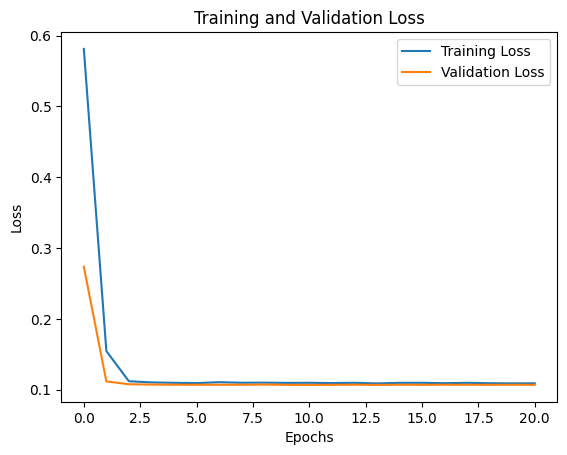

In [195]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [196]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_adjusted, verbose=1)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0133 - loss: 0.1068    
Test Loss: 0.10676288604736328
Test Accuracy: 0.01304347813129425


In [197]:
# Example input for prediction (replace with actual input)
example_input = np.array([[1, 10, 20, 30, 40, 45]])  # Replace with appropriate input
example_input = example_input.reshape((1, 6, 1))  # Reshape to match LSTM input shape

In [198]:
# Predict probabilities for each number
predicted_probabilities = model.predict(example_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


In [199]:
# Select top 6 numbers with the highest probabilities
predicted_numbers = np.argsort(predicted_probabilities[0])[-6:] + 1  # Add 1 to match original label range
predicted_numbers.sort()

In [200]:
# Print the predicted numbers
print("Predicted Lotto Numbers:", predicted_numbers)

Predicted Lotto Numbers: [17 26 27 30 32 33]
